# 🎮 Experiment 5: Naïve Bayes Classification on Video Game Sales
  
Date: *11/02/2026*  

---




## Aim
To apply Naïve Bayes classification on video game sales data.


## Theory
Naïve Bayes is a probabilistic classification algorithm based on Bayes’ theorem.

It assumes features are independent and works well on large datasets.


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading Dataset


In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("vgsales.csv")
df.head()


Saving vgsales.csv to vgsales.csv


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Handling Missing Values


In [ ]:
df = df.dropna()


## Creating Sales Categories


In [ ]:
q1 = df['Global_Sales'].quantile(0.33)
q2 = df['Global_Sales'].quantile(0.66)

def sales_cat(x):
    if x <= q1:
        return 0  # Low
    elif x <= q2:
        return 1  # Medium
    else:
        return 2  # High

df['Sales_Class'] = df['Global_Sales'].apply(sales_cat)


## Feature Selection


In [ ]:
X = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
y = df['Sales_Class']


## Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


## Training Naïve Bayes Model


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

## Prediction

In [ ]:
y_pred = nb.predict(X_test)
y_pred_proba = nb.predict_proba(X_test)


## Model Evaluation


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8866612111292962
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1691
           1       0.76      0.94      0.84      1554
           2       0.99      0.78      0.87      1643

    accuracy                           0.89      4888
   macro avg       0.90      0.89      0.89      4888
weighted avg       0.90      0.89      0.89      4888



## Confusion Matrix


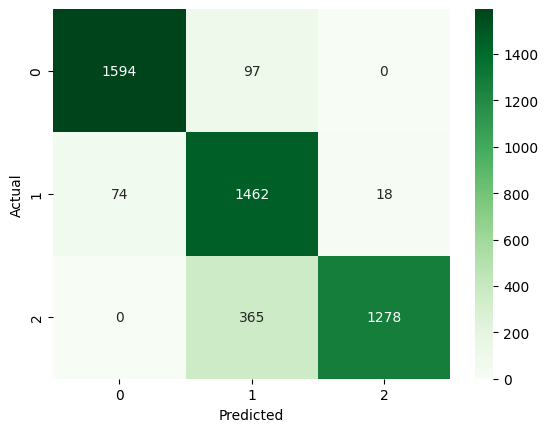

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## ROC Curve


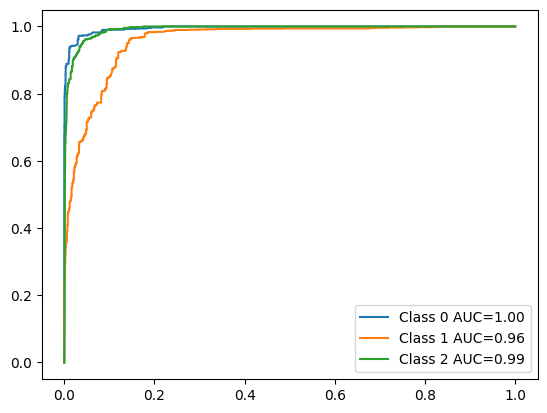

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_test_bin = label_binarize(y_test, classes=[0,1,2])

fpr,tpr,roc_auc = {},{},{}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:,i],
                                  y_pred_proba[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i,color in zip(range(3),['blue','red','green']):
    plt.plot(fpr[i], tpr[i],
             label=f"Class {i} AUC={roc_auc[i]:.2f}")

plt.legend()
plt.show()


## Prediction Probability Distribution


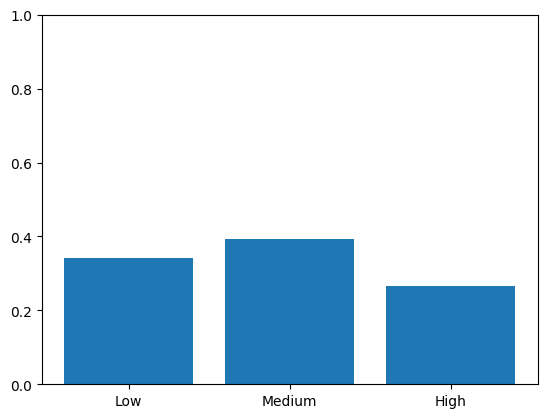

In [ ]:
mean_probs = np.mean(y_pred_proba, axis=0)

plt.bar(['Low','Medium','High'], mean_probs)
plt.ylim([0,1])
plt.show()


## Key Statistics

In [ ]:
print("Prior Probabilities:", nb.class_prior_)
print("Class Counts:", nb.class_count_)


Prior Probabilities: [0.34859248 0.31404016 0.33736736]
Class Counts: [3975. 3581. 3847.]


## Result
Naïve Bayes successfully classified video games into sales categories.


## Conclusion
Naïve Bayes is fast and effective for probabilistic classification.
